In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

In [5]:
df = pd.read_csv('./Data/wine.csv', header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6497 non-null   float64
 1   1       6497 non-null   float64
 2   2       6497 non-null   float64
 3   3       6497 non-null   float64
 4   4       6497 non-null   float64
 5   5       6497 non-null   float64
 6   6       6497 non-null   float64
 7   7       6497 non-null   float64
 8   8       6497 non-null   float64
 9   9       6497 non-null   float64
 10  10      6497 non-null   float64
 11  11      6497 non-null   int64  
 12  12      6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [7]:
df.iloc[:, 12]

0       1
1       1
2       1
3       1
4       1
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: 12, Length: 6497, dtype: int64

In [9]:
y = df.values[:, 12]
x = df.values[:, :12]

In [ ]:
# binary classification, multi classification 두 가지 방식으로 nural network model을 만들고
# train data로 학습시킨 후 test data로 accuracy를 평가하시오

In [8]:
# binary classification

In [12]:
model = Sequential()
model.add(Dense(10, input_dim = 12, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                130       
                                                                 
 dense_1 (Dense)             (None, 8)                 88        
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 227
Trainable params: 227
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss = 'binary_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [16]:
model.fit(x_train, y_train, epochs = 10, batch_size = 10)

Epoch 1/10
488/488 [==============================] - 1s 666us/step - loss: 1.5213 - accuracy: 0.6942
Epoch 2/10
488/488 [==============================] - 0s 663us/step - loss: 0.2702 - accuracy: 0.9064
Epoch 3/10
488/488 [==============================] - 0s 648us/step - loss: 0.2167 - accuracy: 0.9382
Epoch 4/10
488/488 [==============================] - 0s 640us/step - loss: 0.2026 - accuracy: 0.9401
Epoch 5/10
488/488 [==============================] - 0s 655us/step - loss: 0.1963 - accuracy: 0.9403
Epoch 6/10
488/488 [==============================] - 0s 650us/step - loss: 0.1877 - accuracy: 0.9394
Epoch 7/10
488/488 [==============================] - 0s 628us/step - loss: 0.1814 - accuracy: 0.9427
Epoch 8/10
488/488 [==============================] - 0s 622us/step - loss: 0.1753 - accuracy: 0.9442
Epoch 9/10
488/488 [==============================] - 0s 652us/step - loss: 0.1686 - accuracy: 0.9450
Epoch 10/10
488/488 [==============================] - 0s 658us/step - loss: 0.159

In [17]:
model.evaluate(x_test, y_test)

51/51 [==============================] - 0s 588us/step - loss: 0.1466 - accuracy: 0.9538


[0.14655351638793945, 0.9538461565971375]

In [18]:
# multi classification

In [29]:
y_oh = tf.keras.utils.to_categorical(y)
y_oh

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [34]:
model = Sequential()
model.add(Dense(10, input_dim = 12, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                130       
                                                                 
 dense_10 (Dense)            (None, 8)                 88        
                                                                 
 dense_11 (Dense)            (None, 2)                 18        
                                                                 
Total params: 236
Trainable params: 236
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y_oh)

In [37]:
model.fit(x_train, y_train, epochs = 10, batch_size = 10)

Epoch 1/10
488/488 [==============================] - 1s 647us/step - loss: 0.5086 - accuracy: 0.8828
Epoch 2/10
488/488 [==============================] - 0s 660us/step - loss: 0.2042 - accuracy: 0.9304
Epoch 3/10
488/488 [==============================] - 0s 629us/step - loss: 0.1932 - accuracy: 0.9333
Epoch 4/10
488/488 [==============================] - 0s 646us/step - loss: 0.1846 - accuracy: 0.9358
Epoch 5/10
488/488 [==============================] - 0s 650us/step - loss: 0.1729 - accuracy: 0.9386
Epoch 6/10
488/488 [==============================] - 0s 653us/step - loss: 0.1650 - accuracy: 0.9425
Epoch 7/10
488/488 [==============================] - 0s 657us/step - loss: 0.1541 - accuracy: 0.9462
Epoch 8/10
488/488 [==============================] - 0s 670us/step - loss: 0.1452 - accuracy: 0.9470
Epoch 9/10
488/488 [==============================] - 0s 651us/step - loss: 0.1336 - accuracy: 0.9495
Epoch 10/10
488/488 [==============================] - 0s 655us/step - loss: 0.127

In [38]:
model.evaluate(x_test, y_test)

51/51 [==============================] - 0s 628us/step - loss: 0.1104 - accuracy: 0.9600


[0.11039546877145767, 0.9599999785423279]

In [42]:
model.save('/deep_model/wine.h5')

In [43]:
# model checkpointer

In [57]:
import os

In [59]:
model_dir = './deep_model/model_check'
if not os.path.exists(model_dir):
    os.mkdir(model_dir)

In [60]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [61]:
modelpath = './deep_model/moel_check/{epoch:02d}-{val_loss:4f}.hdf5'
checkpointer = ModelCheckpoint(filepath= modelpath, monitor = 'val_loss',\
                              verbose = 1, save_best_only=True)

In [63]:
history = model.fit(x_train, y_train, validation_split = 0.2, batch_size = 50, epochs = 100,\
         callbacks = [checkpointer])

Epoch 1/100
66/78 [========================>.....] - ETA: 0s - loss: 0.0582 - accuracy: 0.9848
Epoch 1: val_loss did not improve from 0.04775
78/78 [==============================] - 0s 1ms/step - loss: 0.0551 - accuracy: 0.9849 - val_loss: 0.0595 - val_accuracy: 0.9774
Epoch 2/100
70/78 [=========================>....] - ETA: 0s - loss: 0.0603 - accuracy: 0.9837
Epoch 2: val_loss did not improve from 0.04775
78/78 [==============================] - 0s 1ms/step - loss: 0.0579 - accuracy: 0.9838 - val_loss: 0.0527 - val_accuracy: 0.9815
Epoch 3/100
69/78 [=========================>....] - ETA: 0s - loss: 0.0552 - accuracy: 0.9858
Epoch 3: val_loss did not improve from 0.04775
78/78 [==============================] - 0s 1ms/step - loss: 0.0558 - accuracy: 0.9846 - val_loss: 0.0491 - val_accuracy: 0.9815
Epoch 4/100
72/78 [==========================>...] - ETA: 0s - loss: 0.0592 - accuracy: 0.9822
Epoch 4: val_loss did not improve from 0.04775
78/78 [==============================] - 0s 1

Epoch 31/100
72/78 [==========================>...] - ETA: 0s - loss: 0.0514 - accuracy: 0.9858
Epoch 31: val_loss did not improve from 0.04515
78/78 [==============================] - 0s 1ms/step - loss: 0.0540 - accuracy: 0.9854 - val_loss: 0.0484 - val_accuracy: 0.9826
Epoch 32/100
68/78 [=========================>....] - ETA: 0s - loss: 0.0521 - accuracy: 0.9874
Epoch 32: val_loss did not improve from 0.04515
78/78 [==============================] - 0s 1ms/step - loss: 0.0539 - accuracy: 0.9864 - val_loss: 0.0508 - val_accuracy: 0.9826
Epoch 33/100
72/78 [==========================>...] - ETA: 0s - loss: 0.0568 - accuracy: 0.9844
Epoch 33: val_loss did not improve from 0.04515
78/78 [==============================] - 0s 1ms/step - loss: 0.0555 - accuracy: 0.9846 - val_loss: 0.0492 - val_accuracy: 0.9826
Epoch 34/100
71/78 [==========================>...] - ETA: 0s - loss: 0.0566 - accuracy: 0.9834
Epoch 34: val_loss did not improve from 0.04515
78/78 [==============================

75/78 [===========================>..] - ETA: 0s - loss: 0.0543 - accuracy: 0.9851
Epoch 60: val_loss did not improve from 0.04382
78/78 [==============================] - 0s 1ms/step - loss: 0.0532 - accuracy: 0.9854 - val_loss: 0.0494 - val_accuracy: 0.9815
Epoch 61/100
70/78 [=========================>....] - ETA: 0s - loss: 0.0554 - accuracy: 0.9860
Epoch 61: val_loss did not improve from 0.04382
78/78 [==============================] - 0s 1ms/step - loss: 0.0524 - accuracy: 0.9864 - val_loss: 0.0458 - val_accuracy: 0.9836
Epoch 62/100
72/78 [==========================>...] - ETA: 0s - loss: 0.0608 - accuracy: 0.9822
Epoch 62: val_loss did not improve from 0.04382
78/78 [==============================] - 0s 1ms/step - loss: 0.0582 - accuracy: 0.9828 - val_loss: 0.0471 - val_accuracy: 0.9836
Epoch 63/100
74/78 [===========================>..] - ETA: 0s - loss: 0.0552 - accuracy: 0.9843
Epoch 63: val_loss did not improve from 0.04382
78/78 [==============================] - 0s 1ms/st

71/78 [==========================>...] - ETA: 0s - loss: 0.0517 - accuracy: 0.9859
Epoch 89: val_loss did not improve from 0.04240
78/78 [==============================] - 0s 1ms/step - loss: 0.0502 - accuracy: 0.9864 - val_loss: 0.0453 - val_accuracy: 0.9826
Epoch 90/100
74/78 [===========================>..] - ETA: 0s - loss: 0.0530 - accuracy: 0.9859
Epoch 90: val_loss did not improve from 0.04240
78/78 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9864 - val_loss: 0.0437 - val_accuracy: 0.9867
Epoch 91/100
76/78 [============================>.] - ETA: 0s - loss: 0.0519 - accuracy: 0.9871
Epoch 91: val_loss did not improve from 0.04240
78/78 [==============================] - 0s 978us/step - loss: 0.0517 - accuracy: 0.9872 - val_loss: 0.0479 - val_accuracy: 0.9846
Epoch 92/100
72/78 [==========================>...] - ETA: 0s - loss: 0.0542 - accuracy: 0.9844
Epoch 92: val_loss did not improve from 0.04240
78/78 [==============================] - 0s 1ms/

In [64]:
history.history

{'loss': [0.05505278706550598,
  0.05792230740189552,
  0.0557887889444828,
  0.05883932113647461,
  0.059909116476774216,
  0.055229414254426956,
  0.053931865841150284,
  0.05505765229463577,
  0.05422671139240265,
  0.05806085094809532,
  0.05579574778676033,
  0.05663377419114113,
  0.0565468929708004,
  0.05715557932853699,
  0.05500409007072449,
  0.05500544607639313,
  0.05571891739964485,
  0.05534740164875984,
  0.05379273742437363,
  0.055112969130277634,
  0.05589340999722481,
  0.05344688892364502,
  0.056852787733078,
  0.056111764162778854,
  0.05601932480931282,
  0.05844567343592644,
  0.05443009361624718,
  0.05571596324443817,
  0.053697146475315094,
  0.05466698110103607,
  0.05400291085243225,
  0.053940124809741974,
  0.05550478771328926,
  0.05508442968130112,
  0.054160796105861664,
  0.05543482303619385,
  0.05544176325201988,
  0.05433051660656929,
  0.05531978979706764,
  0.05451109632849693,
  0.05697197839617729,
  0.054054807871580124,
  0.05238916724920273

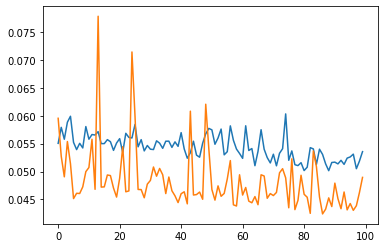

In [65]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

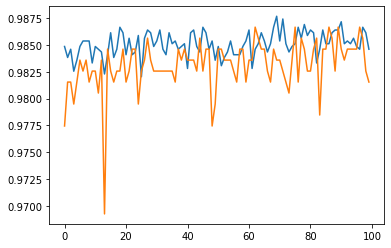

In [66]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [67]:
# early stopping

In [68]:
from tensorflow.keras.callbacks import EarlyStopping

In [71]:
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10)   
# 10번 이상 모델이 개선되지 않으면 중지

In [ ]:
history = model.fit(x_train, y_train, validation_split = 0.2, batch_size = 50, epochs = 100,\
         callbacks = [checkpointer])